## Read and plot a SWOT-L2-HR-SP product  

### Libraries
Please note that apart from the libraries listed in the cell below, you need to install the h5netcdf library (conda install -c conda-forge h5netcdf). This will be used by th xarray.open_dataset function to read the netcdf files.

In [5]:
import os
import numpy as np
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
%matplotlib inline
# remove verbosity of the plt functions
plt.set_loglevel("critical")

### Read a SWOT-HR Single Pass ESRI-Shapefile product with Geopandas

In [46]:
dir_swot = "../docs/data/swot/"
shp_file = os.path.join(
    dir_swot,
    "SWOT_L2_HR_LakeSP_Prior",
    "SWOT_L2_HR_LakeSP_Prior_015_033_SA_20240509T114031_20240509T115835_PIC0_01_extract_simplified.shp",
)
gdf_swot_lake_sp = gpd.read_file(shp_file)

### Discover the Lake Single-Pass product with Geopandas

### Print the content of the product
This product is a subset of a full product (it has been filtered to reduced its size for storage purposes in the the gitlab repo).  
Two complementary datasets exist:
 - SWOT Level-2 HR Lake Single Pass – Observed
 - SWOT Level-2 HR Lake Single Pass - Unassigned (contains the unassigned features - meaning not identified in the Prior Lake Database).

In [47]:
print(f"product: {os.path.basename(shp_file)}")

product: SWOT_L2_HR_LakeSP_Prior_015_033_SA_20240509T114031_20240509T115835_PIC0_01_extract_simplified.shp


In [23]:
# user friendly summary
gdf_swot_lake_sp.head()

,lake_id,reach_id,obs_id,overlap,n_overlap,time,time_tai,time_str,wse,wse_u,...,lake_name,p_res_id,p_lon,p_lat,p_ref_wse,p_ref_area,p_date_t0,p_ds_t0,p_storage,geometry
0,6160012963,61670400343;61670400083;61670400313;6167040033...,616163R000030;616163R000032;616163R000052;6161...,70;0;0;0;0;0;0;0;0,9,7.685711e+08,7.685711e+08,2024-05-09T11:58:24Z,30.791,0.003,...,no_data,2360,-53.020316,4.888948,-1.000000e+12,308.022287,no_data,-1.000000e+12,-1.000000e+12,"MULTIPOLYGON (((-53.05657 4.86904, -53.05644 4..."


In [21]:
print('existing axes:',gdf_swot_lake_sp.axes)

existing axes: [RangeIndex(start=0, stop=1, step=1), Index(['lake_id', 'reach_id', 'obs_id', 'overlap', 'n_overlap', 'time',
       'time_tai', 'time_str', 'wse', 'wse_u', 'wse_r_u', 'wse_std',
       'area_total', 'area_tot_u', 'area_detct', 'area_det_u', 'layovr_val',
       'xtrk_dist', 'ds1_l', 'ds1_l_u', 'ds1_q', 'ds1_q_u', 'ds2_l', 'ds2_l_u',
       'ds2_q', 'ds2_q_u', 'quality_f', 'dark_frac', 'ice_clim_f', 'ice_dyn_f',
       'partial_f', 'xovr_cal_q', 'geoid_hght', 'solid_tide', 'load_tidef',
       'load_tideg', 'pole_tide', 'dry_trop_c', 'wet_trop_c', 'iono_c',
       'xovr_cal_c', 'lake_name', 'p_res_id', 'p_lon', 'p_lat', 'p_ref_wse',
       'p_ref_area', 'p_date_t0', 'p_ds_t0', 'p_storage', 'geometry'],
      dtype='object')]


In [44]:
print('product content: ', gdf_swot_lake_sp)

product content:        lake_id                                           reach_id  \
0  6160012963  61670400343;61670400083;61670400313;6167040033...   

                                              obs_id             overlap  \
0  616163R000030;616163R000032;616163R000052;6161...  70;0;0;0;0;0;0;0;0   

  n_overlap          time      time_tai              time_str     wse  wse_u  \
0         9  7.685711e+08  7.685711e+08  2024-05-09T11:58:24Z  30.791  0.003   

   ...  lake_name  p_res_id      p_lon     p_lat     p_ref_wse  p_ref_area  \
0  ...    no_data      2360 -53.020316  4.888948 -1.000000e+12  308.022287   

   p_date_t0       p_ds_t0     p_storage  \
0    no_data -1.000000e+12 -1.000000e+12   

                                            geometry  
0  MULTIPOLYGON (((-53.05657 4.86904, -53.05644 4...  

[1 rows x 51 columns]


#### Documentation on the Lake SP products
If you wish to understand the role of each field in detail, please read the documentation (in particular section 5 Detailed Content) of https://hydroweb.next.theia-land.fr/docs/collections/resources/swot/Product_Description_Document/SWOT_L2_HR_Lake_Single_Pass/SWOT-TN-CDM-0673-CNES_Product_Description_L2_HR_LakeSP.pdf

### Access one of these fields

In [45]:
selected_lake_id = '6160012963'

# quick and dirty method (valid here as there is a single lake in this file)
print('wse_std: ', gdf_swot_lake_sp['wse_std'][0])

# the generic way
wse = gdf_swot_lake_sp.loc[gdf_swot_lake_sp['lake_id']==selected_lake_id, 'wse'].values[0]
print('wse: ', wse)

wse_std:  0.299
wse:  30.791


### Plot the Lake SP Prior product

#### Plot all water bodies of the product
The cell code is commented as here, the productcontains only one lake

In [49]:
#fig = plt.figure()
#ax = plt.gca()
#gdf_swot_lake_sp.plot(ax=ax, figsize=(15,20))

#### Plot a selected water body 
In this file the products contains only a single lake, therefore there is no apparent difference here on the graphics output, but the code lines are adapted to plot a single water body in the standard case when there are many lakes on the product. 

/home/pfabry/Documents/code/hwn/swot-for-beginners/anaconda3/envs/env1/lib/python3.11/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<Axes: >

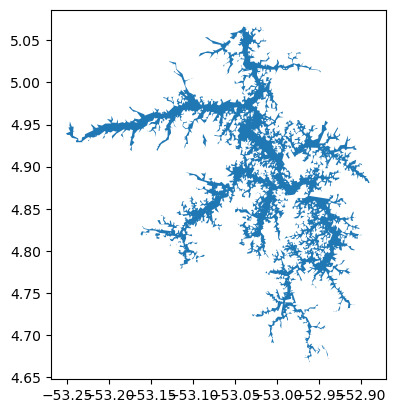

In [42]:
gdf_swot_lake_sp.loc[gdf_swot_lake_sp['lake_id']==selected_lake_id].plot()